## Model Inference

In [1]:
import torch
import numpy as np

from torch.utils.data import Dataset
from PIL import Image
from pathlib import Path
from torch.utils.data import DataLoader

from matplotlib.pyplot import imshow

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
class InferenceData(Dataset):
    def __init__(self, image_files,  transform = None):
        self.image_files = sorted(Path(f) for f in image_files)
        self.images = [np.array(Image.open(img)) for img in self.image_files]
        
    def __len__(self):
        return len(self.image_files)
        
    def __getitem__(self, i):
        img_item = {}
        
        img = np.array(Image.open(self.image_files[i]))

        img_item['img'] = ((img / 127.5) - 1.0).transpose(2, 0, 1).astype(np.float32)
        return img_item

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


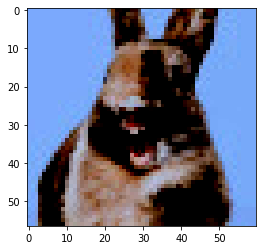

In [4]:
imshow(InferenceData(['./test_image_blurred.jpg',])[0]['img'].transpose(1,2,0))

In [6]:
# Original model
! wget -qq -O srgan_model.py -- https://raw.githubusercontent.com/dongheehand/SRGAN-PyTorch/master/srgan_model.py
! wget -qq -O ops.py -- https://raw.githubusercontent.com/dongheehand/SRGAN-PyTorch/master/ops.py

In [7]:
from srgan_model import Generator

In [8]:
model = Generator(img_feat = 3, n_feats = 64, kernel_size = 3, num_block = 16);

In [10]:
model.load_state_dict(torch.load('../model.pt', map_location=device))
model = model.to(device)
model.eval();

In [11]:
# dataset = InferenceData(['./test_image_blurred.jpg',])
# loader = DataLoader(dataset, batch_size = 1, shuffle = False, num_workers = 1)

In [55]:
# torch.save(model, 'model.torch')

In [12]:
img = np.array(Image.open('./test_image_blurred.jpg'))
batch = torch.tensor(((img / 127.5) - 1.0).transpose(2, 0, 1).astype(np.float32)).unsqueeze(0).to(device)
output, _ = model(batch)
output = output[0].cpu().detach().numpy()
output = (output + 1.0) / 2.0
output = output.transpose(1,2,0)
result = Image.fromarray((output * 255.0).astype(np.uint8))

In [80]:
# with torch.no_grad():
#     for i, te_data in enumerate(loader):
#         img = te_data['img'].to(device)
#         output, _ = model(img)
#         output = output[0].cpu().numpy()
#         output = (output + 1.0) / 2.0
#         output = output.transpose(1,2,0)
#         result = Image.fromarray((output * 255.0).astype(np.uint8))
#         # result.save('./result/res_%04d.png'%i)


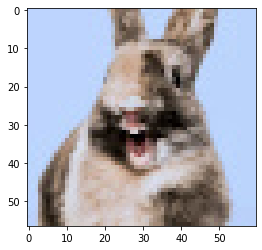

In [14]:
# Original
imshow(Image.open('./test_image_blurred.jpg'))

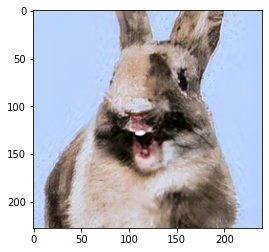

In [16]:
# Predicted
imshow(result)